In [1]:
import nltk
import re
import string
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import pos_tag

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Twitter data sample
tweets = [
    "Just watched the Oscars, what a great show! #Oscars #2022",
    "Can't believe my favorite actor didn't win #Oscars #snubbed",
    "I'm so happy for the Best Director winner! #Oscars #2022"
]

In [5]:
# Preprocess the tweets
processed_tweets = []
for tweet in tweets:
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(tweet.lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    processed_tweets.append(tokens)

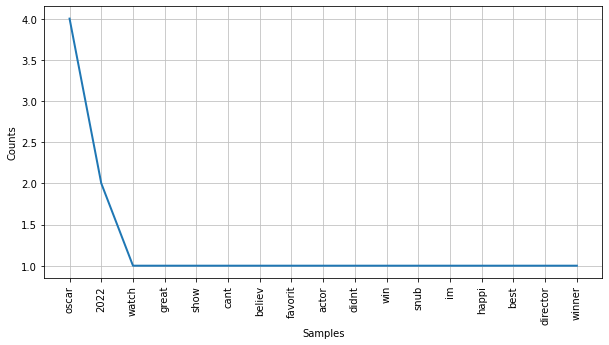

In [6]:
# Visualize word frequency
all_tokens = [token for tweet in processed_tweets for token in tweet]
freq_dist = FreqDist(all_tokens)
plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False)
plt.show()

In [7]:
# Part-of-speech tagging
pos_tags = pos_tag(all_tokens)
df = pd.DataFrame(pos_tags, columns=['Token', 'POS Tag'])
print(df)

       Token POS Tag
0      watch      NN
1      oscar      NN
2      great      JJ
3       show      NN
4      oscar      NN
5       2022      CD
6       cant      NN
7     believ      NN
8    favorit      NN
9      actor      NN
10     didnt      NN
11       win     VBP
12     oscar      NN
13      snub      NN
14        im      NN
15     happi      NN
16      best     JJS
17  director      NN
18    winner      NN
19     oscar      NN
20      2022      CD
